In [ ]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



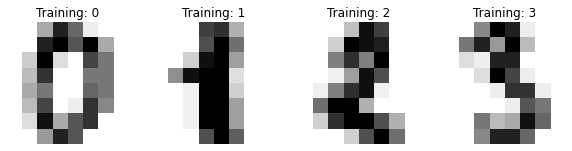

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



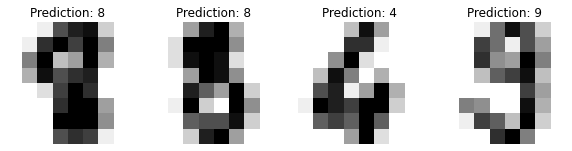

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


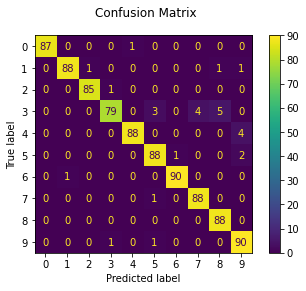

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Lấy ảnh từ webcam, chạy trên Google Colab

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

### Lưu ảnh vào file photo.jpg

<IPython.core.display.Javascript object>

Saved to photo.jpg


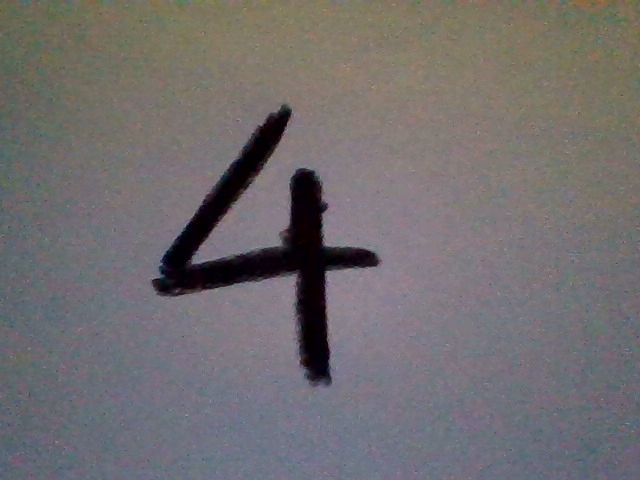

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Xử lý ảnh

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

_image = cv2.imread("photo.jpg", 0)

print(_image)
print(_image.shape)
min = 0
for xx in range(_image.shape[0]):
    for yy in range(_image.shape[1]):
        if _image[xx][yy] < min :
            max = _image[xx][yy]

print(min)

[[ 95  94  94 ... 106 101  95]
 [ 93  93  95 ... 105 101  98]
 [ 92  94  97 ... 102 102 102]
 ...
 [ 95  95  95 ... 101 100 100]
 [101 100  98 ... 100  99  99]
 [106 103 100 ...  99  98  98]]
(480, 640)
0


### Cắt ảnh vùng có số


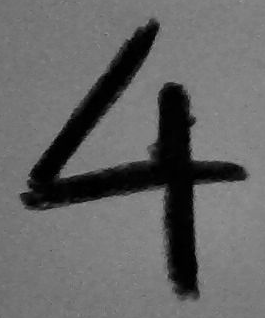

In [ ]:
top   = _image.shape[0]//2
bot   = _image.shape[0]//2
left  = _image.shape[1]//2
right = _image.shape[1]//2

DARK = 60
for xx in range(_image.shape[0]):
    for yy in range(_image.shape[1]):
        if _image[xx][yy] <= DARK:
            if top >= xx: top = xx
            if bot <= xx: bot = xx
            if left >= yy: left = yy
            if right <= yy: right = yy

strictedImg = _image[top-20:bot+20,left-20:right+20]
cv2_imshow( strictedImg)

### Chỉnh ảnh về format có thể đưa vào model

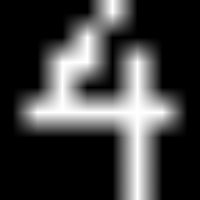

In [ ]:
strictedImg_resized = cv2.resize(strictedImg, dsize=(8,8))
(thresh ,strictedImg_resized) = cv2.threshold(strictedImg_resized, 100, 255, cv2.THRESH_BINARY)
strictedImg_resized = 255 - strictedImg_resized[:,:]
strictedImg_show = cv2.resize( strictedImg_resized, dsize=(200,200))
cv2_imshow(strictedImg_show)

### Reshape thành vector 1 chiều để đưa vào model và dự đoán

In [ ]:
strictedImg_resized = np.expand_dims(strictedImg_resized, axis = 0)
strictedImg_resized = strictedImg_resized.reshape((1,64))
strictedImg_resized = strictedImg_resized[:,:]/16

In [ ]:
print(strictedImg_resized)

[[ 0.      0.      0.      0.     15.9375  0.      0.      0.      0.
   0.      0.     15.9375  0.      0.      0.      0.      0.      0.
  15.9375 15.9375  0.     15.9375  0.      0.      0.      0.     15.9375
   0.      0.     15.9375  0.      0.      0.     15.9375 15.9375 15.9375
  15.9375 15.9375 15.9375  0.      0.      0.      0.      0.      0.
  15.9375  0.      0.      0.      0.      0.      0.      0.     15.9375
   0.      0.      0.      0.      0.      0.      0.     15.9375  0.
   0.    ]]


### Dự đoán và in ra kết quả

In [ ]:
_result = clf.predict(strictedImg_resized)
print(_result)

[4]
